In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt

In [2]:
EXPERIMENT_DIR = '/Users/darylwilding-mcbride/Downloads/experiments/P3856'
MAPPING_FILE_NAME = "{}/percolator-idx-mapping.csv".format(EXPERIMENT_DIR)

In [3]:
# determine the mapping between the percolator index and the run file name
def get_percolator_run_mapping(mapping_file_name):
    df = pd.read_csv(mapping_file_name)
    mapping_l = [tuple(r) for r in df.to_numpy()]
    return mapping_l

def run_name_for_file_idx(file_idx, run_mapping_l):
    result = None
    for m in run_mapping_l:
        if m[0] == file_idx:
            result = m[1]
            break
    return result

In [4]:
run_mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)

In [5]:
identifications_df = pd.read_pickle('{}/percolator-id-feature-mapping.pkl'.format(EXPERIMENT_DIR))

In [6]:
identifications_df['run_name'] = identifications_df.file_idx.apply(lambda x: run_name_for_file_idx(x, run_mapping_l))
identifications_df['group'] = identifications_df['run_name'].apply(lambda x: x.split('_')[1])

In [7]:
identifications_df.sample(n=3)

,file_idx,scan,charge_x,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,total matches/spectrum,...,intensity,precursor_id,monoisotopic_mass,predicted_mass_error,recalibrated_monoisotopic_mass,recalibrated_monoisotopic_mz,percolator_idx,human,run_name,group
70594,6,2549501,2,1190.0582,2378.1018,2379.1091,1.249986,0.000004,1.289463e-07,663.613,...,386300.0,25495,2379.101915,-0.007203,2379.109119,1190.561835,6,True,P3856_YHE114_5_Slot1-1_1_5119,YHE114
560064,2,1805501,1,1073.5596,1072.5523,1073.5604,0.066060,0.003753,1.923035e-01,663.613,...,61836.0,18055,1073.558263,-0.001347,1073.559610,1074.566886,2,True,P3856_YHE010_6_Slot1-1_1_5098,YHE010
340936,23,746601,2,673.3216,1344.6286,1345.6361,0.682433,0.000017,7.467895e-05,663.613,...,326958.0,7466,1345.632838,-0.003012,1345.635849,673.825201,23,True,P3856_YHE010_8_Slot1-1_1_5100,YHE010


In [8]:
selected_peptide = 'YAGEVSHDDK'
selected_peptide_charge = 2
selected_group = 'YHE114'
selected_df = identifications_df[(identifications_df.group == selected_group) & (identifications_df.sequence == selected_peptide) & (identifications_df.charge_x == selected_peptide_charge)]

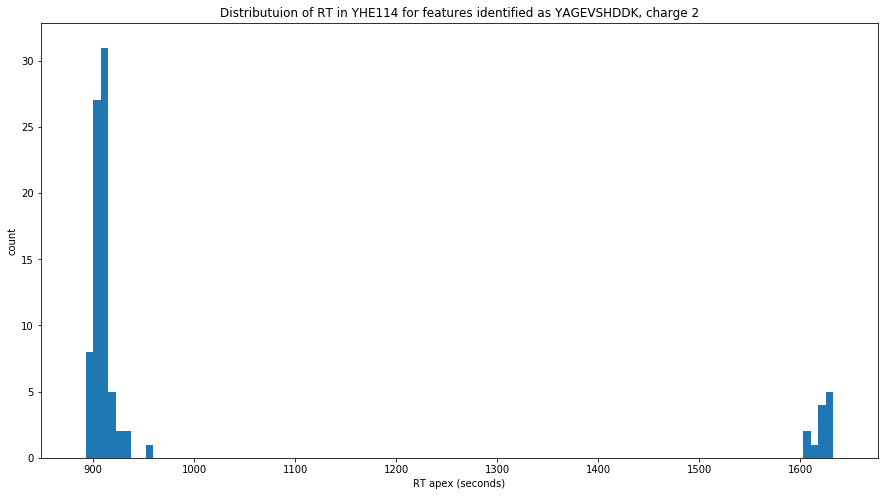

In [9]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Distributuion of RT in {} for features identified as {}, charge {}'.format(selected_group, selected_peptide, selected_peptide_charge))

bins = 100
hist, bins, _ = plt.hist(selected_df.rt_apex, bins=bins)
plt.xlabel('RT apex (seconds)')
plt.ylabel('count')

# plt.ylim((0,5500))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()